# Feature Engineering

### Packages and Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer

from textblob import TextBlob
from textblob import Word

stop = stopwords.words('english')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

[nltk_data] Downloading package stopwords to /home/tom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load Data

In [2]:
main = pd.read_csv('main.csv').drop('Unnamed: 0', 1)

/home/tom/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (222,223) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Inspect

In [3]:
main.head(1)

,level_0,ep_id,full_name,date_of_birth,hometown,country,youth_team,position,height,weight,shoots,status,scout_text,regular_gp_13,regular_gp_14,regular_gp_15,regular_gp_16,regular_g_13,regular_g_14,regular_g_15,regular_g_16,regular_a_13,regular_a_14,regular_a_15,regular_a_16,regular_pim_13,regular_pim_14,regular_pim_15,regular_pim_16,regular_pm_13,regular_pm_14,regular_pm_15,regular_pm_16,regular_gp_17,regular_g_17,regular_a_17,regular_pim_17,regular_pm_17,regular_gp_18,regular_g_18,regular_a_18,regular_pim_18,regular_pm_18,regular_gp_19,regular_g_19,regular_a_19,regular_pim_19,regular_pm_19,regular_gp_11,regular_gp_12,regular_g_11,regular_g_12,regular_a_11,regular_a_12,regular_pim_11,regular_pim_12,regular_pm_11,regular_pm_12,regular_gp_20,regular_g_20,regular_a_20,regular_pim_20,regular_pm_20,regular_gp_21,regular_g_21,regular_a_21,regular_pim_21,regular_pm_21,regular_gp_22,regular_g_22,regular_a_22,regular_pim_22,regular_pm_22,regular_gp_23,regular_g_23,regular_a_23,regular_pim_23,regular_pm_23,regular_gp_24,regular_g_24,regular_a_24,regular_pim_24,regular_pm_24,regular_gp_10,regular_g_10,regular_a_10,regular_pim_10,regular_pm_10,regular_gp_25,regular_g_25,regular_a_25,regular_pim_25,regular_pm_25,regular_gp_26,regular_g_26,regular_a_26,regular_pim_26,regular_pm_26,regular_gp_27,regular_g_27,regular_a_27,regular_pim_27,regular_pm_27,regular_gp_28,regular_g_28,regular_a_28,regular_pim_28,regular_pm_28,regular_gp_29,regular_g_29,regular_a_29,regular_pim_29,regular_pm_29,regular_gp_30,regular_g_30,regular_a_30,regular_pim_30,regular_pm_30,regular_gp_31,regular_g_31,regular_a_31,regular_pim_31,regular_pm_31,regular_gp_32,regular_g_32,regular_a_32,regular_pim_32,regular_pm_32,regular_gp_33,regular_g_33,regular_a_33,regular_pim_33,regular_pm_33,regular_gp_34,regular_g_34,regular_a_34,regular_pim_34,regular_pm_34,regular_gp_35,regular_g_35,regular_a_35,regular_pim_35,regular_pm_35,regular_gp_36,regular_g_36,regular_a_36,regular_pim_36,regular_pm_36,regular_gp_37,regular_g_37,regular_a_37,regular_pim_37,regular_pm_37,regular_gp_38,regular_g_38,regular_a_38,regular_pim_38,regular_pm_38,regular_gp_39,regular_g_39,regular_a_39,regular_pim_39,regular_pm_39,team_13,team_14,team_15,team_16,league_13,league_14,league_15,league_16,team_17,league_17,team_18,league_18,team_19,league_19,team_11,team_12,league_11,league_12,team_20,league_20,team_21,league_21,team_22,league_22,team_23,league_23,team_24,league_24,team_10,league_10,team_25,league_25,team_26,league_26,team_27,league_27,team_28,league_28,team_29,league_29,team_30,league_30,team_31,league_31,team_32,league_32,team_33,league_33,team_34,league_34,team_35,league_35,team_36,league_36,team_37,league_37,team_38,league_38,team_39,league_39,playoffs_gp,playoffs_g,playoffs_a,awarded,national_team
0,0,10689,Nathan Barrett,"Aug 03, 1981","Vancouver, BC, CAN",Canada,-,C,"6'0"" / 183 cm",190 lbs / 86 kg,L,Retired,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,1.0,1.0,23.0,-8.0,55.0,21.0,18.0,36.0,-0.0,72.0,44.0,38.0,38.0,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,46.0,53.0,66.0,2.0,72.0,45.0,62.0,100.0,-5.0,69.0,9.0,22.0,35.0,-9.0,49.0,17.0,21.0,41.0,0.0,61.0,17.0,22.0,34.0,-3.0,NaN,NaN,NaN,NaN,NaN,78.0,30.0,31.0,68.0,-13.0,34.0,12.0,10.0,32.0,-0.0,23.0,11.0,15.0,16.0,-1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tri-City Americans,WHL,Tri-City Americans,WHL,Lethbridge Hurricanes,WHL,NaN,NaN,NaN,NaN,Lethbridge Hurricanes,WHL,Lethbridge Hurricanes,WHL,St. John's Maple Leafs,AHL,St. John's Maple Leafs,AHL,St. John's Maple Leafs,AHL,NaN,NaN,Norfolk Admirals,AHL,Straubing Tigers,DEL,Victoria Salmon Kings,ECHL,Wheeling Nailers,ECHL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,3.0,5

### Refactor league_25 as the response

In [4]:
replacements = {
    np.nan: 'Not Active',
    0: 'Not Active',
    'ECHL': 'Lower',
    'AHL': 'Lower',
    'USports': 'Lower',
    'NCHL': 'Lower',
    'LHSAM': 'Lower',
    'LHCS': 'Lower',
    'LNAH': 'Lower',
    'CHL': 'Lower',
    'NCHL-MB': 'Lower',
    'NLSHL': 'Lower',
    'SPHL': 'Lower',
    'LHSR': 'Lower',
    'LHSCE': 'Lower',
    'SEMHL': 'Lower',
    'NESHL': 'Lower',
    'WOAA': 'Lower',
    'HHL': 'Lower',
    'CRL': 'Lower',
    'FPHL': 'Lower',
    'Chinook HL': 'Lower',
    'FHL': 'Lower',
    'LHSAAAQ': 'Lower',
    'BSHL': 'Lower',
    'NPHL-Sr.': 'Lower',
    'WMHL': 'Lower',
    'ACHW': 'Lower',
    'GLHL': 'Lower',
    'RHL': 'Lower',
    'ACAC': 'Lower',
    'SVHL': 'Lower',
    'SWHL': 'Lower',
    'BCIHL': 'Lower',
    'QVHL': 'Lower',
    'WCSHL': 'Lower',
    'LHBBF': 'Lower',
    'OHL': 'Lower',
    'BRHL': 'Lower',
    'FCHL': 'Lower',
    'THHL': 'Lower',
    'ACHA II': 'Lower',
    'LHSLF': 'Lower',
    'CIHL': 'Lower',
    'LRH': 'Lower',
    'NSHL-Sr.': 'Lower',
    'LHSEQ': 'Lower',
    'ACH': 'Lower',
    'IHL': 'Lower',
    'MSHL': 'Lower',
    'SASHL': 'Lower',
    'CSHL-Sr.': 'Lower',
    'USHL': 'Lower',
    'OWSHL': 'Lower',
    'LLHL': 'Lower',
    'CWSHL': 'Lower',
    'LHSBEQ': 'Lower',
    'QSCHL': 'Lower',
    'LHSAO': 'Lower',
    'ASHL': 'Lower',
    'NCAA III': 'Lower',
    'THL': 'Lower',
    'AAHL': 'Lower',
    'Notekeu HL': 'Lower',
    'QMJHL': 'Lower',
    'ACHA III': 'Lower',
    'LHSCN': 'Lower',
    'EPHL': 'Lower',
    'SHL': 'Lower',
    'NLA': 'Lower', 
    'Russia': 'Lower', 
    'Germany3': 'Lower',
    'Germany2': 'Lower',
    'NLB': 'Lower',
    'EIHL': 'Lower',
    'KHL': 'Lower',
    'France': 'Lower',
    'Italy': 'Lower',
    'DEL': 'Lower',
    'EBEL': 'Lower',
    'Netherlands': 'Lower', 
    'Czech': 'Lower',
    'Slovakia': 'Lower',
    'Liiga': 'Lower', 
    'Allsvenskan': 'Lower',
    'Czech2': 'Lower',
    'Norway': 'Lower', 
    'Germany5': 'Lower', 
    'Denmark': 'Lower',
    'Belarus': 'Lower',
    'DEL2': 'Lower',
    'VHL': 'Lower',
    'Slovakia2': 'Lower',
    'Division 1': 'Lower', 
    'NZIHL': 'Lower', 
    'AlpsHL': 'Lower', 
    'Czech3': 'Lower',
    'NIHL 1': 'Lower',
    'Asia League': 'Lower',
    'Kazakhstan': 'Lower',
    'France2': 'Lower',
    'Serbia': 'Lower',
    'Czech4': 'Lower',
    'Division 2': 'Lower',
    'NCAA': 'Lower',
    'AIHL': 'Lower',
    'EPIHL': 'Lower',
    'France3': 'Lower',
    'Poland': 'Lower',
    'International': 'Lower',
    'Italy2': 'Lower', 
    'UHL': 'Lower',
    'Russia2': 'Lower',
    'MLH': 'Lower',
    'Russia3': 'Lower', 
    'Erste Liga': 'Lower', 
    'SwissDiv1': 'Lower',
    'Suomi-sarja': 'Lower',
    'Mestis': 'Lower',
    'Germany4': 'Lower', 
    'EOSHL-Sr': 'Lower', 
    'ULLH': 'Lower',
    'CIHL HK': 'Lower', 
    'ECSHL': 'Lower',
    'Spain': 'Lower',
    'Latvia': 'Lower',
    'Czech5': 'Lower',
    'Slovakia Q': 'Lower',
    'Czech2 Q': 'Lower'
}

main['response'] = main['league_25'].replace(replacements)

In [5]:
main['response'].unique()

array(['Lower', 'NHL', 'Not Active'], dtype=object)

### Refactor country as birth_region

In [6]:
main['country'] = main['country'].str.extract(r'(\w+)\s')

In [7]:
main['country'].unique()

array([nan, 'Canada', 'USA', 'Czech', 'Hungary', 'Germany', 'South',
       'Switzerland', 'Austria', 'Kazakhstan', 'England', 'Russia',
       'Netherlands', 'Serbia', 'Turkey', 'Denmark', 'Sweden', 'Italy',
       'France', 'Croatia', 'Belarus', 'Poland', 'Norway', 'Finland',
       'Latvia', 'Belgium', 'Portugal', 'Slovakia'], dtype=object)

In [8]:
regions = {
    'Czech': 'Eastern Europe',
    'Sweden': 'Scandanavia',
    'Germany': 'Western Europe',
    'Slovakia': 'Eastern Europe',
    'Finland': 'Scandanavia',
    'Italy': 'Western Europe',
    'Norway': 'Scandanavia',
    'Switzerland': 'Western Europe',
    'Latvia': 'Eastern Europe',
    'Ukraine': 'Eastern Europe',
    'Denmark': 'Scandanavia',
    'Hungary': 'Eastern Europe',
    'Belarus': 'Eastern Europe',
    'Kazakhstan': 'Eastern Europe',
    'Slovenia': 'Eastern Europe',
    'U': 'Western Europe', # U is United Kingdom (UK)
    'Austria': 'Western Europe',
    'France': 'Western Europe',
    'South': 'Asia',
    'Croatia': 'Eastern Europe',
    'Israel': 'Eastern Europe',
    'Poland': 'Eastern Europe',
    'England': 'Western Europe',
    'Japan': 'Asia',
    'Netherlands': 'Western Europe',
    np.nan: 'Canada',
    'Serbia': 'Eastern Europe',
    'Turkey': 'Eastern Europe',
    'Belgium': 'Western Europe',
    'Portugal': 'Western Europe'
}

main['birth_region'] = main['country'].replace(regions)

In [9]:
main['birth_region'].unique()

array(['Canada', 'USA', 'Eastern Europe', 'Western Europe', 'Asia',
       'Russia', 'Scandanavia'], dtype=object)

### Manage position

In [10]:
main['position'].unique()

array(['C', 'RW', 'C/LW', 'LW/C', 'LW', 'C/RW', 'F', 'LW/RW', 'D', 'W/C',
       'C/W', 'RW/LW', 'C/D', 'D/C', 'RW/C', 'RW/D', 'D/W', 'D/LW',
       'D/RW', 'D/F', 'LW/D', 'C/RW/D', 'F/D', 'F/RW', 'W/D', 'LW/C/D',
       'W'], dtype=object)

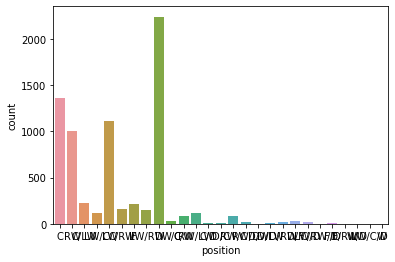

In [11]:
sns.countplot(main['position'])

In [12]:
positions = {
    'RW/C': 'Forward',
    'C/LW': 'Forward',
    'RW/LW': 'Winger',
    'D/F': 'Mixed',
    'F': 'Forward',
    'LW/D': 'Mixed',
    'C/RW': 'Forward',
    'LW/RW': 'Forward',
    'LW/C': 'Forward',
    'LW/C/D': 'Mixed',
    'D/W': 'Mixed',
    'W/C/D': 'Mixed',
    'W/C': 'Forward',
    'C/W': 'Forward',
    'D/RW': 'Mixed',
    'F/D': 'Mixed',
    'D/LW': 'Mixed',
    'RW/D': 'Mixed',
    'D/C': 'Mixed',
    'C/RW/D': 'Mixed',
    'W/D': 'Mixed',
    'W': 'Forward',
    'C/D': 'Mixed',
    'F/RW': 'Forward',
    'Winger': 'Forward',
    'Mixed': 'Forward'
}

main['position'] = main['position'].replace(positions)

In [13]:
main['position'].unique()

array(['C', 'RW', 'Forward', 'LW', 'D', 'Winger', 'Mixed'], dtype=object)

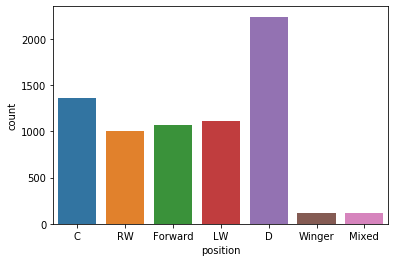

In [14]:
sns.countplot(main['position'])

### Subset and reorder

In [15]:
columns = sorted([i for i in main.columns.unique()])
columns

['awarded',
 'birth_region',
 'country',
 'date_of_birth',
 'ep_id',
 'full_name',
 'height',
 'hometown',
 'league_10',
 'league_11',
 'league_12',
 'league_13',
 'league_14',
 'league_15',
 'league_16',
 'league_17',
 'league_18',
 'league_19',
 'league_20',
 'league_21',
 'league_22',
 'league_23',
 'league_24',
 'league_25',
 'league_26',
 'league_27',
 'league_28',
 'league_29',
 'league_30',
 'league_31',
 'league_32',
 'league_33',
 'league_34',
 'league_35',
 'league_36',
 'league_37',
 'league_38',
 'league_39',
 'level_0',
 'national_team',
 'playoffs_a',
 'playoffs_g',
 'playoffs_gp',
 'position',
 'regular_a_10',
 'regular_a_11',
 'regular_a_12',
 'regular_a_13',
 'regular_a_14',
 'regular_a_15',
 'regular_a_16',
 'regular_a_17',
 'regular_a_18',
 'regular_a_19',
 'regular_a_20',
 'regular_a_21',
 'regular_a_22',
 'regular_a_23',
 'regular_a_24',
 'regular_a_25',
 'regular_a_26',
 'regular_a_27',
 'regular_a_28',
 'regular_a_29',
 'regular_a_30',
 'regular_a_31',
 'regular_

In [16]:
reorder = ['ep_id', 'height', 'weight', 
           'regular_gp_17', 'regular_g_17', 'regular_a_17', 'regular_pm_17',
           'regular_gp_16', 'regular_g_16', 'regular_a_16', 'regular_pm_16',
           'playoffs_gp', 'playoffs_g', 'playoffs_a',
           'national_team', 'awarded', 'scout_text', 'birth_region', 'position', 'shoots', 'response'
]

main = main[reorder]

In [17]:
main.sample(10)

,ep_id,height,weight,regular_gp_17,regular_g_17,regular_a_17,regular_pm_17,regular_gp_16,regular_g_16,regular_a_16,regular_pm_16,playoffs_gp,playoffs_g,playoffs_a,national_team,awarded,scout_text,birth_region,position,shoots,response
1658,352029,"6'1"" / 185 cm",176 lbs / 80 kg,44.0,3.0,15.0,0.0,44.0,2.0,8.0,0.0,27.0,0.0,5.0,No,Yes,-,Canada,D,L,Not Active
6951,396918,"5'9"" / 174 cm",174 lbs / 79 kg,36.0,24.0,34.0,2.0,36.0,43.0,45.0,0.0,19.0,5.0,6.0,Yes,No,-,Canada,LW,R,Not Active
6136,56056,"5'11"" / 180 cm",187 lbs / 85 kg,38.0,2.0,14.0,0.0,35.0,3.0,8.0,0.0,78.0,5.0,20.0,No,No,-,Canada,D,L,Not Active
2380,120199,"5'11"" / 180 cm",185 lbs / 84 kg,59.0,9.0,14.0,6.0,36.0,19.0,21.0,0.0,50.0,25.0,26.0,No,Yes,Brother: Erik Gardiner,Canada,RW,R,Not Active
6023,12279,"5'11"" / 180 cm",176 lbs / 80 kg,42.0,3.0,17.0,0.0,58.0,16.0,23.0,0.0,120.0,2.0,30.0,No,Yes,Bodnarchuk is known as a defenseman with a sol...,Canada,D,L,Lower
1354,15738,"6'0"" / 184 cm",176 lbs / 80 kg,37.0,23.0,28.0,0.0,20.0,7.0,1.0,0.0,83.0,22.0,36.0,No,No,-,Canada,LW,L,Lower
1311,154643,"6'1"" / 185 cm",172 lbs / 78 kg,35.0,15.0,17.0,0.0,30.0,15.0,16.0,0.0,22.0,8.0,6.0,No,No,Name also listed/spelled Chasetan Braid,Canada,Forward,L,Not Active
2111,439848,"6'2"" / 188 cm",194 lbs / 88 kg,43.0,10.0,9.0,-3.0,34.0,5.0,4.0,0.0,11.0,0.0,1.0,No,No,-,Canada,RW,L,Not Active
6956,492143,"6'4"" / 193 cm",192 lbs / 87 kg,39.0,9.0,12.0,-12.0,18.0,5.0,22.0,0.0,11.0,7.0,9.0,No,Yes,"Cousins: Brad Malone, Brett Malone, Mark Malon...",Canada,C,L,Not Active
1529,15743,"6'1"" / 185 cm",198 lbs / 90 kg,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,56.0,7.0,3.0,No,No,-,Canada,C,L,Not Active


### Height

In [18]:
main['height'] = main['height'].str.extract(r'/\s(\d{3})\scm')
main = main[pd.notnull(main['height'])]
main['height'] = main['height'].astype(int)

### Weight

In [19]:
main['weight'] = main['weight'].str.extract(r'/\s(\d+)\skg')
main['weight'] = main['weight'].astype(int)
main = main.loc[main['weight'] > 40]

In [20]:
round(main.response.value_counts() / len(main), 2)

Not Active    0.61
Lower         0.33
NHL           0.06
Name: response, dtype: float64

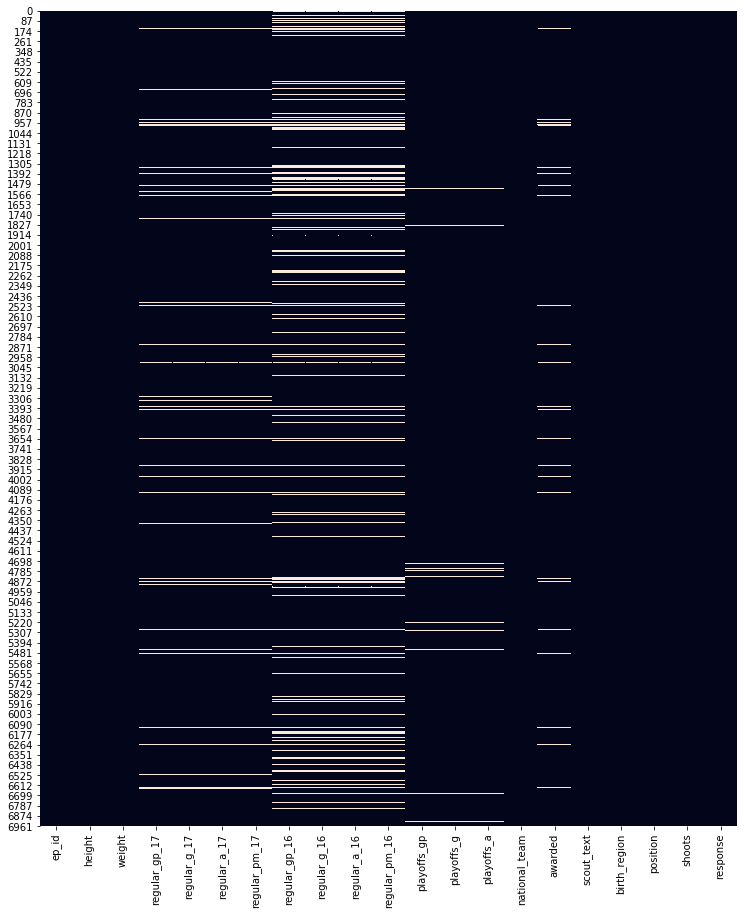

In [21]:
fig, ax = plt.subplots(1, figsize=[12.5, 15])

ax = sns.heatmap(main.isnull(), cbar=False)

plt.show()

In [22]:
missing = main.isna()
pd.Series(missing.sum() / len(missing)).sort_values(ascending=False)

regular_pm_16    0.120876
regular_a_16     0.120876
regular_g_16     0.120876
regular_gp_16    0.120876
regular_pm_17    0.033276
regular_gp_17    0.033276
regular_g_17     0.033276
regular_a_17     0.033276
awarded          0.024175
playoffs_a       0.012372
playoffs_g       0.012372
playoffs_gp      0.012372
height           0.000000
weight           0.000000
response         0.000000
shoots           0.000000
national_team    0.000000
scout_text       0.000000
birth_region     0.000000
position         0.000000
ep_id            0.000000
dtype: float64

### Impute values

In [23]:
main.columns

Index(['ep_id', 'height', 'weight', 'regular_gp_17', 'regular_g_17',
       'regular_a_17', 'regular_pm_17', 'regular_gp_16', 'regular_g_16',
       'regular_a_16', 'regular_pm_16', 'playoffs_gp', 'playoffs_g',
       'playoffs_a', 'national_team', 'awarded', 'scout_text', 'birth_region',
       'position', 'shoots', 'response'],
      dtype='object')

In [24]:
main['regular_gp_16'] = main['regular_gp_16'].replace({np.nan: main['regular_gp_16'].median(skipna=True)})
main['regular_g_16'] = main['regular_g_16'].replace({np.nan: main['regular_g_16'].median(skipna=True)})
main['regular_a_16'] = main['regular_a_16'].replace({np.nan: main['regular_a_16'].median(skipna=True)})
main['regular_pm_16'] = main['regular_pm_16'].replace({np.nan: main['regular_pm_16'].median(skipna=True)})
main['regular_gp_17'] = main['regular_gp_17'].replace({np.nan: main['regular_gp_17'].median(skipna=True)})
main['regular_g_17'] = main['regular_g_17'].replace({np.nan: main['regular_g_17'].median(skipna=True)})
main['regular_a_17'] = main['regular_a_17'].replace({np.nan: main['regular_a_17'].median(skipna=True)})
main['regular_pm_17'] = main['regular_pm_17'].replace({np.nan: main['regular_pm_17'].median(skipna=True)})
main['playoffs_gp'] = main['playoffs_gp'].replace({np.nan: main['playoffs_gp'].median(skipna=True)})
main['playoffs_g'] = main['playoffs_g'].replace({np.nan: main['playoffs_g'].median(skipna=True)})
main['playoffs_a'] = main['playoffs_a'].replace({np.nan: main['playoffs_a'].median(skipna=True)})

main['awarded'] = main['awarded'].fillna('No')

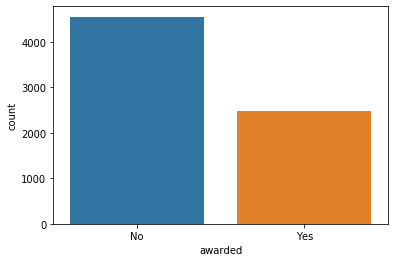

In [25]:
sns.countplot(main['awarded'])

In [26]:
main['awarded'].unique()

array(['No', 'Yes'], dtype=object)

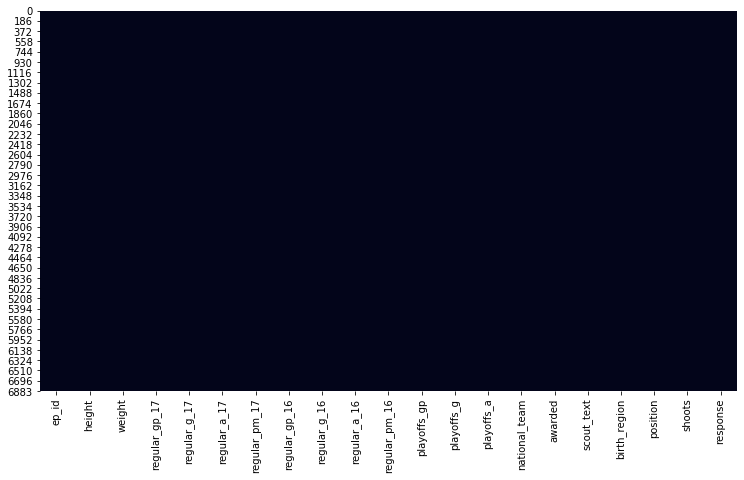

In [27]:
fig, ax = plt.subplots(1, figsize=[12.5, 7])

ax = sns.heatmap(main.isnull(), cbar=False)

plt.show()

In [28]:
missing = main.isna()
pd.Series(missing.sum() / len(missing)).sort_values(ascending=False)

response         0.0
regular_a_16     0.0
height           0.0
weight           0.0
regular_gp_17    0.0
regular_g_17     0.0
regular_a_17     0.0
regular_pm_17    0.0
regular_gp_16    0.0
regular_g_16     0.0
regular_pm_16    0.0
shoots           0.0
playoffs_gp      0.0
playoffs_g       0.0
playoffs_a       0.0
national_team    0.0
awarded          0.0
scout_text       0.0
birth_region     0.0
position         0.0
ep_id            0.0
dtype: float64

## Scouting Reports

In [29]:
for i in main['scout_text']:
    
    print(i)

-
-
-
-
-
-
Team Staff profile of Mikhail Yakubov also available
-
A solid scorer at the AHL level. Possesses a good shot and offensive instincts. His lack of consistency has kept him from making an impact in the NHL. (EP 2009)
Kelly is a big center with a great reach. Has good hands and vision and can play on the powerplay. Is an above-average faceoff man, but isn't a very good skater.- Ulf Andersson, EP
A hard-working forward who can play all offensive positions. Has a decent release, good passing and good hockey sense. Strong defensively. Has had injury worries. (Matias Strozyk, 2011)
-
-
Cousins: Joe Gatenby, Danny Gatenby
Segal is a big and strong two-way winger. Plays a physical, straightforward game. Owns a hard shot, but lacks natural offense flair.- Erik K. Piri, EP
-
Cousin: Mitch Atkins
-
Missed most of 2002-03 season due to brain surgery. Participant on Making the Cut
-
Wirll is a speedy winger who likes to shoot the puck. Works hard all over the ice. Is very strong for his

Brother: Oskar Berglund
-
-
-
Team Staff profile of Max Ross also available
-
-
-
-
-
-
Brother: Alex Petan
Cousins: Dante Hannoun, Demico Hannoun
-
-
Father: Todd Bjorkstrand
Brother: Patrick Bjorkstrand
Father: Tim Leier
Cousin: Boston Leier
-
-
Father: Peter Draisaitl
-
-
-
A defenseman with an excellent frame. Jones' athleticism allows him to be a very good skater for a player of his size. He has excellent mobility and is solid both offensively and defensively. Jones gives a smart first pass and is also capable of utilizing his skating ability to bring the puck up himself. He has good hockey sense and is an asset on the powerplay thanks to his mobility, puck-handling and a very dangerous slap shot.(Matias Strozyk, 2012)

Father: Popeye Jones (Retired NBA Player - external source)
Brothers: Caleb Jones, Justin Jones
Brother: Mitch Maxwell

Cousin: Brooks Maxwell

Uncle: Bryan Maxwell

• Missed two seasons of play due to LDS missionary work
Brothers: Samuel Walker, Jack Walker
Uncle:

-
A passionate scoring winger, Alexander Radulov creates chances offensively whenever he’s on the ice. Possesses quick hands and tremendous puck skills. Radulov has good size and strength, while he does a great job protecting the puck and is hard to knock off it. A fast skater, who has strong shooting tools and can rip hard wrist or backhand shots. Radulov has excellent vision and can make fine seem plays. Has improved his play without the puck, it’s still among his weaknesses, though. A true game-breaking forward, who has matured over the past couple of years and can electrify a team’s offense. (by Rafik Soliman, February 2017)


Father: Valeri Radulov  Brother: Igor Radulov
A very intelligent player who is good in the faceoff circle and can play wing as well. Latendresse is a respected team leader even if when he isn't wearing a "C" or an "A".
He's also good on the powerplay and penalty kill.

Brother : Guillaume Latendresse
Coulombe is a terrific skater with great mobility. He is an

In [30]:
partial = pd.read_csv('scout_text_partial_label.csv').drop('Unnamed: 0', 1)
partial = partial[partial['type'] == 'Yes']
response = main[['ep_id', 'response']]
partial = pd.merge(partial, response, on='ep_id', how='left')

In [31]:
partial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647 entries, 0 to 646
Data columns (total 4 columns):
ep_id         647 non-null int64
scout_text    647 non-null object
type          647 non-null object
response      595 non-null object
dtypes: int64(1), object(3)
memory usage: 25.3+ KB


In [32]:
for i in partial['scout_text']:
    
    print(i)

A smooth skating defenceman who can put up points, utilizing his strength behind his shot, and plays with an edge. Has very good awareness on the ice, and notices possible scoring chances before they happen. Very intelligent defensively and makes high percentage decisions in his own end. When at the top of his game, Nicolas Meloche can be a game-changing, physical two-way defenceman.
McMillan is a hard working winger. Has decent hands and hockey sense, but could improve his skating speed.- Erik K. Piri, EP
Beck is a big winger with a good shot and offensive instincts. At his best when he goes to the net. Needs to improve his defensive game and skating ability.- Erik K. Piri, EP (2012)
Maxwell is a skilled two-way center. Is very solid defensively and reads the play well. Prefers to pass rather than shoot himself.- Erik K. Piri, EP
Stanton has all-around ability, but focuses on defense first. He likes to play a rough game, but can also put up some points on offense.- Erik K. Piri, EP
Al

In [33]:
def avg_words(sentence):
    words = sentence.split()
    return round((sum(len(word) for word in words)/len(words)), 2)

In [34]:
partial['scout_text'] = partial['scout_text'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
partial['scout_text'] = partial['scout_text'].str.replace('[^\w\s]','')
partial['scout_text'] = partial['scout_text'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))

In [35]:
partial['word_count'] = partial['scout_text'].apply(lambda x: len(str(x).split(' ')))
partial['char_count'] = partial['scout_text'].str.len()
partial['avg_word'] = partial['scout_text'].apply(lambda x: avg_words(x))
partial['stop_words'] = partial['scout_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
partial['upper'] = partial['scout_text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

In [36]:
freq = pd.Series(' '.join(partial['scout_text']).split()).value_counts()[:10]

In [37]:
freq = list(freq.index)
partial['scout_text'] = partial['scout_text'].apply(lambda x: ' '.join(x for x in x.split() if x not in freq))

In [38]:
freq = pd.Series(' '.join(partial['scout_text']).split()).value_counts()[-1636:]

In [39]:
freq = list(freq.index)
partial['scout_text'] = partial['scout_text'].apply(lambda x: ' '.join(x for x in x.split() if x not in freq))

In [40]:
partial['scout_text'] = partial['scout_text'].apply(lambda x: str(TextBlob(x).correct()))

In [41]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/tom/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
TextBlob(partial['scout_text'][1]).words

WordList(['macmillan', 'working', 'finger', 'decent', 'hands', 'hockey', 'sense', 'could', 'improve', 'stating', 'speed', 'erie', 'k', 'peri'])

In [43]:
st = PorterStemmer()
partial['scout_text'] = partial['scout_text'].apply(lambda x: ' '.join([st.stem(word) for word in x.split()]))

In [44]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/tom/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
partial['scout_text'] = partial['scout_text'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))

In [46]:
partial['sentiment'] = partial['scout_text'].apply(lambda x: TextBlob(x).sentiment[0])

In [47]:
partial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647 entries, 0 to 646
Data columns (total 10 columns):
ep_id         647 non-null int64
scout_text    647 non-null object
type          647 non-null object
response      595 non-null object
word_count    647 non-null int64
char_count    647 non-null int64
avg_word      647 non-null float64
stop_words    647 non-null int64
upper         647 non-null int64
sentiment     647 non-null float64
dtypes: float64(2), int64(5), object(3)
memory usage: 75.6+ KB


In [48]:
partial.sample(10)

,ep_id,scout_text,type,response,word_count,char_count,avg_word,stop_words,upper,sentiment
332,73397,righthand finger realli state lot energi like ...,Yes,Lower,29,193,5.69,0,0,0.500000
389,37455,defenseman puckmov abil big defens lack size g...,Yes,Lower,18,120,5.72,0,0,0.000000
259,9232,offens skill defenseman size speed hand contro...,Yes,NaN,19,138,6.32,0,0,0.000000
306,232703,small today defenseman excel state abil tremen...,Yes,Not Active,77,525,5.83,0,0,0.204422
628,55940,gritti today forward ear minut fattest slater ...,Yes,Lower,37,265,6.19,0,0,-0.600000
493,36711,big finger like physic agit oppon display inst...,Yes,Lower,22,146,5.68,0,0,0.000000
480,62587,come 20112012 season build goal oh rook season...,Yes,Not Active,27,198,6.37,0,0,0.000000
136,252480,today power forward thrive pressur bring versa...,Yes,Not Active,125,894,6.16,0,0,0.063492
248,9247,finger hand control like heavi traffic doesn s...,Yes,Lower,17,107,5.35,0,0,0.000000
115,15588,defenseman sound playmak abil could improv def...,Yes,Lower,21,154,6.38,0,0,0.400000


In [49]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7032
Data columns (total 21 columns):
ep_id            7032 non-null int64
height           7032 non-null int64
weight           7032 non-null int64
regular_gp_17    7032 non-null float64
regular_g_17     7032 non-null float64
regular_a_17     7032 non-null float64
regular_pm_17    7032 non-null float64
regular_gp_16    7032 non-null float64
regular_g_16     7032 non-null float64
regular_a_16     7032 non-null float64
regular_pm_16    7032 non-null float64
playoffs_gp      7032 non-null float64
playoffs_g       7032 non-null float64
playoffs_a       7032 non-null float64
national_team    7032 non-null object
awarded          7032 non-null object
scout_text       7032 non-null object
birth_region     7032 non-null object
position         7032 non-null object
shoots           7032 non-null object
response         7032 non-null object
dtypes: float64(11), int64(3), object(7)
memory usage: 1.5+ MB


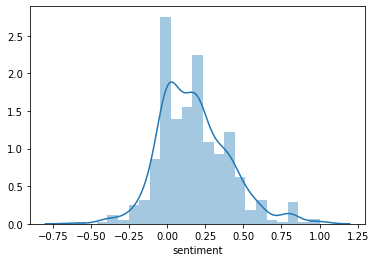

In [50]:
sns.distplot(partial['sentiment'])

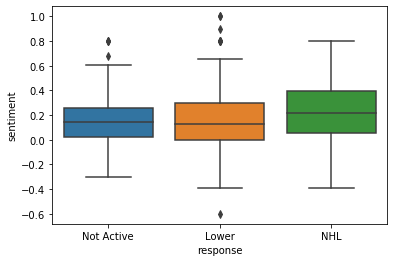

In [51]:
sns.boxplot(partial['response'], partial['sentiment'])

In [52]:
keep = [
    'ep_id', 'type', 'word_count', 'char_count', 'avg_word', 'stop_words', 'upper', 'sentiment'
]

partial = partial[keep]

In [53]:
main = pd.merge(main, partial, on='ep_id', how='left')

In [54]:
main = main[main['type'] == 'Yes']

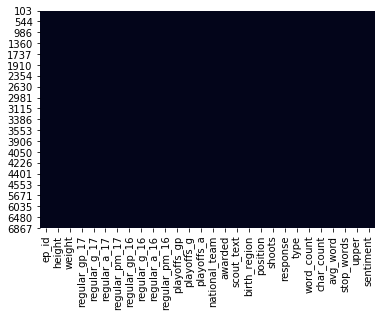

In [55]:
sns.heatmap(main.isnull(), cbar=False)

In [56]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595 entries, 103 to 6952
Data columns (total 28 columns):
ep_id            595 non-null int64
height           595 non-null int64
weight           595 non-null int64
regular_gp_17    595 non-null float64
regular_g_17     595 non-null float64
regular_a_17     595 non-null float64
regular_pm_17    595 non-null float64
regular_gp_16    595 non-null float64
regular_g_16     595 non-null float64
regular_a_16     595 non-null float64
regular_pm_16    595 non-null float64
playoffs_gp      595 non-null float64
playoffs_g       595 non-null float64
playoffs_a       595 non-null float64
national_team    595 non-null object
awarded          595 non-null object
scout_text       595 non-null object
birth_region     595 non-null object
position         595 non-null object
shoots           595 non-null object
response         595 non-null object
type             595 non-null object
word_count       595 non-null float64
char_count       595 non-null fl

### Inspect and Export

In [57]:
main = main.drop(['ep_id', 'scout_text'], axis=1)

In [58]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595 entries, 103 to 6952
Data columns (total 26 columns):
height           595 non-null int64
weight           595 non-null int64
regular_gp_17    595 non-null float64
regular_g_17     595 non-null float64
regular_a_17     595 non-null float64
regular_pm_17    595 non-null float64
regular_gp_16    595 non-null float64
regular_g_16     595 non-null float64
regular_a_16     595 non-null float64
regular_pm_16    595 non-null float64
playoffs_gp      595 non-null float64
playoffs_g       595 non-null float64
playoffs_a       595 non-null float64
national_team    595 non-null object
awarded          595 non-null object
birth_region     595 non-null object
position         595 non-null object
shoots           595 non-null object
response         595 non-null object
type             595 non-null object
word_count       595 non-null float64
char_count       595 non-null float64
avg_word         595 non-null float64
stop_words       595 non-null

In [59]:
main.to_csv('main_test.csv')